# <center>IAIO Prep 1</center>
Autor: Morariu Tudor

## Pas 1: Date

### Pas 1.1: Citire

In [146]:
import matplotlib.pyplot as plt



In [147]:
import pandas as pd

train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

test_data_customer_ids = test_data["id"]

In [148]:
train_data

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [149]:
def apply_new_features(data):
    data["EstimatedMonthlySalary"] = data["EstimatedSalary"] / 12
    data["Tenure/NumOfProducts"] = data["Tenure"] / data["NumOfProducts"]
    data["Balance/NumOfProducts"] = data["Balance"] / data["NumOfProducts"]
    data["Balance/EstimatedMonthlySalary"] = data["Balance"] / data["EstimatedMonthlySalary"]
    data["Age/EstimatedSalary"] = data["Age"] / data["EstimatedSalary"]

    return data

train_data = apply_new_features(train_data);
test_data = apply_new_features(test_data)

### Pas 1.2: Label Encoding

In [150]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

# train_data["Age"] = train_data["Age"].apply(lambda x: x // 10)
# test_data["Age"] = test_data["Age"].apply(lambda x: x // 10)

# train_data["Balance"] = train_data["Balance"].apply(lambda x: 1 if x == 0 else 2 if x < 100000 else 3)
# test_data["Balance"] = test_data["Balance"].apply(lambda x: 1 if x == 0 else 2 if x < 100000 else 3)

train_data["Gender"] = encoder.fit_transform(train_data["Gender"])
train_data["Geography"] = encoder.fit_transform(train_data["Geography"])

test_data["Gender"] = encoder.fit_transform(test_data["Gender"])
test_data["Geography"] = encoder.fit_transform(test_data["Geography"])

In [151]:
drop_cols = ["Surname", "id"]

train_data.drop(columns=drop_cols, inplace=True)
test_data.drop(columns=drop_cols, inplace=True)

#### Pas 1.2.1: Normalizare

In [152]:
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler()

train_data = pd.DataFrame(norm.fit_transform(train_data), train_data.index, train_data.columns)
test_data = pd.DataFrame(norm.fit_transform(test_data), test_data.index, test_data.columns)

### Pas 1.2.2: Data Enchanceing

In [153]:
train_data

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,EstimatedMonthlySalary,Tenure/NumOfProducts,Balance/NumOfProducts,Balance/EstimatedMonthlySalary,Age/EstimatedSalary
0,0.436943,0.636,0.0,1.0,0.202703,0.3,0.000000,0.333333,1.0,0.0,0.907279,0.0,0.907279,0.15,0.000000,0.000000,0.000020
1,0.733936,0.554,0.0,1.0,0.202703,0.1,0.000000,0.333333,1.0,1.0,0.247483,0.0,0.247483,0.05,0.000000,0.000000,0.000128
2,0.515259,0.656,0.0,1.0,0.297297,1.0,0.000000,0.333333,1.0,0.0,0.924364,0.0,0.924364,0.50,0.000000,0.000000,0.000028
3,0.702895,0.462,0.0,1.0,0.216216,0.2,0.593398,0.000000,1.0,1.0,0.422787,0.0,0.422787,0.20,0.624540,0.000137,0.000069
4,0.801919,0.732,1.0,1.0,0.202703,0.5,0.000000,0.333333,1.0,1.0,0.075293,0.0,0.075293,0.25,0.000000,0.000000,0.000468
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,0.405554,0.634,1.0,0.0,0.202703,0.2,0.000000,0.000000,1.0,1.0,0.659179,0.0,0.659179,0.20,0.000000,0.000000,0.000036
165030,0.399298,0.884,0.0,1.0,0.229730,0.3,0.000000,0.000000,0.0,0.0,0.659177,0.0,0.659177,0.30,0.000000,0.000000,0.000039
165031,0.396221,0.430,0.0,1.0,0.175676,0.5,0.000000,0.000000,1.0,1.0,0.637151,0.0,0.637151,0.50,0.000000,0.000000,0.000034
165032,0.495674,0.408,1.0,0.0,0.162162,0.7,0.643819,0.000000,0.0,1.0,0.355841,0.0,0.355841,0.70,0.677607,0.000176,0.000074


In [154]:


def exited_proc_in_fn_col(col, df):
    map_col_exit_pr = {}
    df_g = df.groupby([col, "Exited"]).count()
    display(df_g)
    idx = 0;

    for i in range(0, len(df_g.index), 2):
        sum = df_g.values[i][0] + df_g.values[i + 1][0]
        map_col_exit_pr[df_g.index[idx][0]] = df_g.values[i][0] / sum

        idx += 2

    return map_col_exit_pr


map_count_customer_id = {}

def count_customer_id(row):
    global map_count_customer_id

    customer_id = row["CustomerId"]

    if(customer_id not in map_count_customer_id):
        map_count_customer_id[customer_id] = [0, 0]

    if(row["Exited"] == 0):
        map_count_customer_id[customer_id][0] += 1
    else:
        map_count_customer_id[customer_id][1] += 1

    return row


map_count_age_id = {}

def count_age_id(row):
    global map_count_age_id

    customer_id = row["Age"]

    if(customer_id not in map_count_age_id):
        map_count_age_id[customer_id] = [0, 0]

    if(row["Exited"] == 0):
        map_count_age_id[customer_id][0] += 1
    else:
        map_count_age_id[customer_id][1] += 1

    return row

train_data = train_data.apply(count_age_id, axis=1)

map_Country = exited_proc_in_fn_col("Geography", train_data)
map_HasCrCard = exited_proc_in_fn_col("HasCrCard", train_data)
map_Gender = exited_proc_in_fn_col("Gender", train_data)
map_NumProd = exited_proc_in_fn_col("NumOfProducts", train_data)
map_Balance = exited_proc_in_fn_col("Balance", train_data)

# map_Age = exited_proc_in_fn_col("Age", train_data)

display(map_Country)
display(map_HasCrCard)
display(map_Gender)
display(map_NumProd)
display(map_Balance)
# display(map_Age)

train_data["geo_proc"] = train_data["Geography"].apply(lambda x: map_Country[x])
train_data["has_cr_card_proc"] = train_data["HasCrCard"].apply(lambda x: map_HasCrCard[x])
train_data["gender_proc"] = train_data["Gender"].apply(lambda x: map_Gender[x])
train_data["num_of_products_proc"] = train_data["NumOfProducts"].apply(lambda x: map_NumProd[x])
train_data["age_proc"] = train_data["Age"].apply(lambda x: map_count_age_id[x][0] / (map_count_age_id[x][0] + map_count_age_id[x][1]))
# train_data["balance_proc"] = train_data["Balance"].apply(lambda x: map_Balance[x])

# train_data["age_proc"] = train_data["Age"].apply(lambda x: map_Age[x])

test_data["geo_proc"] = test_data["Geography"].apply(lambda x: map_Country[x])
test_data["has_cr_card_proc"] = test_data["HasCrCard"].apply(lambda x: map_HasCrCard[x])
test_data["gender_proc"] = test_data["Gender"].apply(lambda x: map_Gender[x])
test_data["num_of_products_proc"] = test_data["NumOfProducts"].apply(lambda x: map_NumProd[x])
test_data["age_proc"] = test_data["Age"].apply(lambda x: map_count_age_id[x][0] / (map_count_age_id[x][0] + map_count_age_id[x][1]) if x in map_count_age_id else 0.5)
# test_data["balance_proc"] = test_data["Balance"].apply(lambda x: map_Balance[x])

# test_data["age_proc"] = test_data["Age"].apply(lambda x: map_Age[x])

CustomerId  CreditScore  Gender    Age  Tenure  Balance  \
Geography Exited                                                            
0.0       0.0          78643        78643   78643  78643   78643    78643   
          1.0          15572        15572   15572  15572   15572    15572   
0.5       0.0          21492        21492   21492  21492   21492    21492   
          1.0          13114        13114   13114  13114   13114    13114   
1.0       0.0          29978        29978   29978  29978   29978    29978   
          1.0           6235         6235    6235   6235    6235     6235   

                  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
Geography Exited                                                              
0.0       0.0             78643      78643           78643            78643   
          1.0             15572      15572           15572            15572   
0.5       0.0             21492      21492           21492            21492   
          1.0             13114      13114           13114            13114   
1.0       0.0             29978      29978           29978            29978   
          1.0              6235       6235            6235             6235   

                  EstimatedMonthlySalary  Tenure/NumOfProducts  \
Geography Exited                                                 
0.0       0.0                      78643                 78643   
          1.0                      15572                 15572   
0.5       0.0                      21492                 21492   
          1.0                      13114                 13114   
1.0       0.0                      29978                 29978   
          1.0                       6235                  6235   

                  Balance/NumOfProducts  Balance/EstimatedMonthlySalary  \
Geography Exited                                                          
0.0       0.0                     78643                           78643   
          1.0                     15572                           15572   
0.5       0.0                     21492                           21492   
          1.0                     13114                           13114   
1.0       0.0                     29978                           29978   
          1.0                      6235                            6235   

                  Age/EstimatedSalary  
Geography Exited                       
0.0       0.0                   78643  
          1.0                   15572  
0.5       0.0                   21492  
          1.0                   13114  
1.0       0.0                   29978  
          1.0                    6235

CustomerId  CreditScore  Geography  Gender    Age  Tenure  \
HasCrCard Exited                                                              
0.0       0.0          31371        31371      31371   31371  31371   31371   
          1.0           9235         9235       9235    9235   9235    9235   
1.0       0.0          98742        98742      98742   98742  98742   98742   
          1.0          25686        25686      25686   25686  25686   25686   

                  Balance  NumOfProducts  IsActiveMember  EstimatedSalary  \
HasCrCard Exited                                                            
0.0       0.0       31371          31371           31371            31371   
          1.0        9235           9235            9235             9235   
1.0       0.0       98742          98742           98742            98742   
          1.0       25686          25686           25686            25686   

                  EstimatedMonthlySalary  Tenure/NumOfProducts  \
HasCrCard Exited                                                 
0.0       0.0                      31371                 31371   
          1.0                       9235                  9235   
1.0       0.0                      98742                 98742   
          1.0                      25686                 25686   

                  Balance/NumOfProducts  Balance/EstimatedMonthlySalary  \
HasCrCard Exited                                                          
0.0       0.0                     31371                           31371   
          1.0                      9235                            9235   
1.0       0.0                     98742                           98742   
          1.0                     25686                           25686   

                  Age/EstimatedSalary  
HasCrCard Exited                       
0.0       0.0                   31371  
          1.0                    9235  
1.0       0.0                   98742  
          1.0                   25686

CustomerId  CreditScore  Geography    Age  Tenure  Balance  \
Gender Exited                                                               
0.0    0.0          51779        51779      51779  51779   51779    51779   
       1.0          20105        20105      20105  20105   20105    20105   
1.0    0.0          78334        78334      78334  78334   78334    78334   
       1.0          14816        14816      14816  14816   14816    14816   

               NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
Gender Exited                                                              
0.0    0.0             51779      51779           51779            51779   
       1.0             20105      20105           20105            20105   
1.0    0.0             78334      78334           78334            78334   
       1.0             14816      14816           14816            14816   

               EstimatedMonthlySalary  Tenure/NumOfProducts  \
Gender Exited                                                 
0.0    0.0                      51779                 51779   
       1.0                      20105                 20105   
1.0    0.0                      78334                 78334   
       1.0                      14816                 14816   

               Balance/NumOfProducts  Balance/EstimatedMonthlySalary  \
Gender Exited                                                          
0.0    0.0                     51779                           51779   
       1.0                     20105                           20105   
1.0    0.0                     78334                           78334   
       1.0                     14816                           14816   

               Age/EstimatedSalary  
Gender Exited                       
0.0    0.0                   51779  
       1.0                   20105  
1.0    0.0                   78334  
       1.0                   14816

CustomerId  CreditScore  Geography  Gender    Age  \
NumOfProducts Exited                                                      
0.000000      0.0          50516        50516      50516   50516  50516   
              1.0          26858        26858      26858   26858  26858   
0.333333      0.0          79198        79198      79198   79198  79198   
              1.0           5093         5093       5093    5093   5093   
0.666667      0.0            340          340        340     340    340   
              1.0           2554         2554       2554    2554   2554   
1.000000      0.0             59           59         59      59     59   
              1.0            416          416        416     416    416   

                      Tenure  Balance  HasCrCard  IsActiveMember  \
NumOfProducts Exited                                               
0.000000      0.0      50516    50516      50516           50516   
              1.0      26858    26858      26858           26858   
0.333333      0.0      79198    79198      79198           79198   
              1.0       5093     5093       5093            5093   
0.666667      0.0        340      340        340             340   
              1.0       2554     2554       2554            2554   
1.000000      0.0         59       59         59              59   
              1.0        416      416        416             416   

                      EstimatedSalary  EstimatedMonthlySalary  \
NumOfProducts Exited                                            
0.000000      0.0               50516                   50516   
              1.0               26858                   26858   
0.333333      0.0               79198                   79198   
              1.0                5093                    5093   
0.666667      0.0                 340                     340   
              1.0                2554                    2554   
1.000000      0.0                  59                      59   
              1.0                 416                     416   

                      Tenure/NumOfProducts  Balance/NumOfProducts  \
NumOfProducts Exited                                                
0.000000      0.0                    50516                  50516   
              1.0                    26858                  26858   
0.333333      0.0                    79198                  79198   
              1.0                     5093                   5093   
0.666667      0.0                      340                    340   
              1.0                     2554                   2554   
1.000000      0.0                       59                     59   
              1.0                      416                    416   

                      Balance/EstimatedMonthlySalary  Age/EstimatedSalary  
NumOfProducts Exited                                                       
0.000000      0.0                              50516                50516  
              1.0                              26858                26858  
0.333333      0.0                              79198                79198  
              1.0                               5093                 5093  
0.666667      0.0                                340                  340  
              1.0                               2554                 2554  
1.000000      0.0                                 59                   59  
              1.0                                416                  416

CustomerId  CreditScore  Geography  Gender    Age  Tenure  \
Balance  Exited                                                              
0.000000 0.0          75156        75156      75156   75156  75156   75156   
         1.0          14492        14492      14492   14492  14492   14492   
0.000073 0.0              1            1          1       1      1       1   
0.015021 0.0              2            2          2       2      2       2   
         1.0              1            1          1       1      1       1   
...                     ...          ...        ...     ...    ...     ...   
0.885888 0.0              3            3          3       3      3       3   
         1.0              2            2          2       2      2       2   
0.950137 0.0              4            4          4       4      4       4   
         1.0              4            4          4       4      4       4   
1.000000 0.0              3            3          3       3      3       3   

                 NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  \
Balance  Exited                                                              
0.000000 0.0             75156      75156           75156            75156   
         1.0             14492      14492           14492            14492   
0.000073 0.0                 1          1               1                1   
0.015021 0.0                 2          2               2                2   
         1.0                 1          1               1                1   
...                        ...        ...             ...              ...   
0.885888 0.0                 3          3               3                3   
         1.0                 2          2               2                2   
0.950137 0.0                 4          4               4                4   
         1.0                 4          4               4                4   
1.000000 0.0                 3          3               3                3   

                 EstimatedMonthlySalary  Tenure/NumOfProducts  \
Balance  Exited                                                 
0.000000 0.0                      75156                 75156   
         1.0                      14492                 14492   
0.000073 0.0                          1                     1   
0.015021 0.0                          2                     2   
         1.0                          1                     1   
...                                 ...                   ...   
0.885888 0.0                          3                     3   
         1.0                          2                     2   
0.950137 0.0                          4                     4   
         1.0                          4                     4   
1.000000 0.0                          3                     3   

                 Balance/NumOfProducts  Balance/EstimatedMonthlySalary  \
Balance  Exited                                                          
0.000000 0.0                     75156                           75156   
         1.0                     14492                           14492   
0.000073 0.0                         1                               1   
0.015021 0.0                         2                               2   
         1.0                         1                               1   
...                                ...                             ...   
0.885888 0.0                         3                               3   
         1.0                         2                               2   
0.950137 0.0                         4                               4   
         1.0                         4                               4   
1.000000 0.0                         3                               3   

                 Age/EstimatedSalary  
Balance  Exited                       
0.000000 0.0                   75156  
         1.0                   14492  
0.000073 0.0          

{0.0: 0.8347184630897415, 0.5: 0.6210483731144888, 1.0: 0.8278242620053572}

{0.0: 0.7725705560754569, 1.0: 0.7935673642588484}

{0.0: 0.7203132825107117, 1.0: 0.8409447128287708}

{0.0: 0.6528808126760928,
 0.3333333333333333: 0.9395783654245412,
 0.6666666666666667: 0.11748445058742225,
 1.0: 0.12421052631578948}

{0.0: 0.838345529180796,
 7.305755097617522e-05: 0.3333333333333333,
 0.015020799879345436: 0.5,
 0.039475868469146184: 0.5,
 0.04411109705936781: 0.3333333333333333,
 0.04965836926060299: 0.5,
 0.0553942040770418: 0.5,
 0.05684698516437491: 0.5714285714285714,
 0.09582954577294711: 0.6666666666666666,
 0.1038552346093986: 0.5,
 0.10967460932046157: 0.75,
 0.11062646989460942: 0.5,
 0.1119297081934741: 0.75,
 0.11798447728318699: 0.5,
 0.13769662415524966: 0.16666666666666666,
 0.1395650321610659: 0.3333333333333333,
 0.14169023765784747: 0.3333333333333333,
 0.14245501031913: 0.5,
 0.15027133128036171: 0.5,
 0.15281112741830757: 0.4,
 0.1539158787538: 0.5,
 0.15561413799523147: 0.5,
 0.1568159805441325: 0.7,
 0.15984780912441385: 0.5,
 0.16011644409090564: 0.75,
 0.16032286256144876: 0.3333333333333333,
 0.16137532174916122: 0.3333333333333333,
 0.16216113881137956: 0.5,
 0.16460480029959576: 0.5,
 0.16529950467139867: 0.8333333333333334,
 0.17149899387436549: 0.6666666666666666,
 0.1

### Pas 1.3: Plot-uri

#### Pas 1.3.1 Histograma

array([[<Axes: title={'center': 'CustomerId'}>,
        <Axes: title={'center': 'CreditScore'}>,
        <Axes: title={'center': 'Geography'}>,
        <Axes: title={'center': 'Gender'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Tenure'}>,
        <Axes: title={'center': 'Balance'}>,
        <Axes: title={'center': 'NumOfProducts'}>,
        <Axes: title={'center': 'HasCrCard'}>,
        <Axes: title={'center': 'IsActiveMember'}>],
       [<Axes: title={'center': 'EstimatedSalary'}>,
        <Axes: title={'center': 'Exited'}>,
        <Axes: title={'center': 'EstimatedMonthlySalary'}>,
        <Axes: title={'center': 'Tenure/NumOfProducts'}>,
        <Axes: title={'center': 'Balance/NumOfProducts'}>],
       [<Axes: title={'center': 'Balance/EstimatedMonthlySalary'}>,
        <Axes: title={'center': 'Age/EstimatedSalary'}>,
        <Axes: title={'center': 'geo_proc'}>,
        <Axes: title={'center': 'has_cr_card_proc'}>,
        <Axes: title={'center'

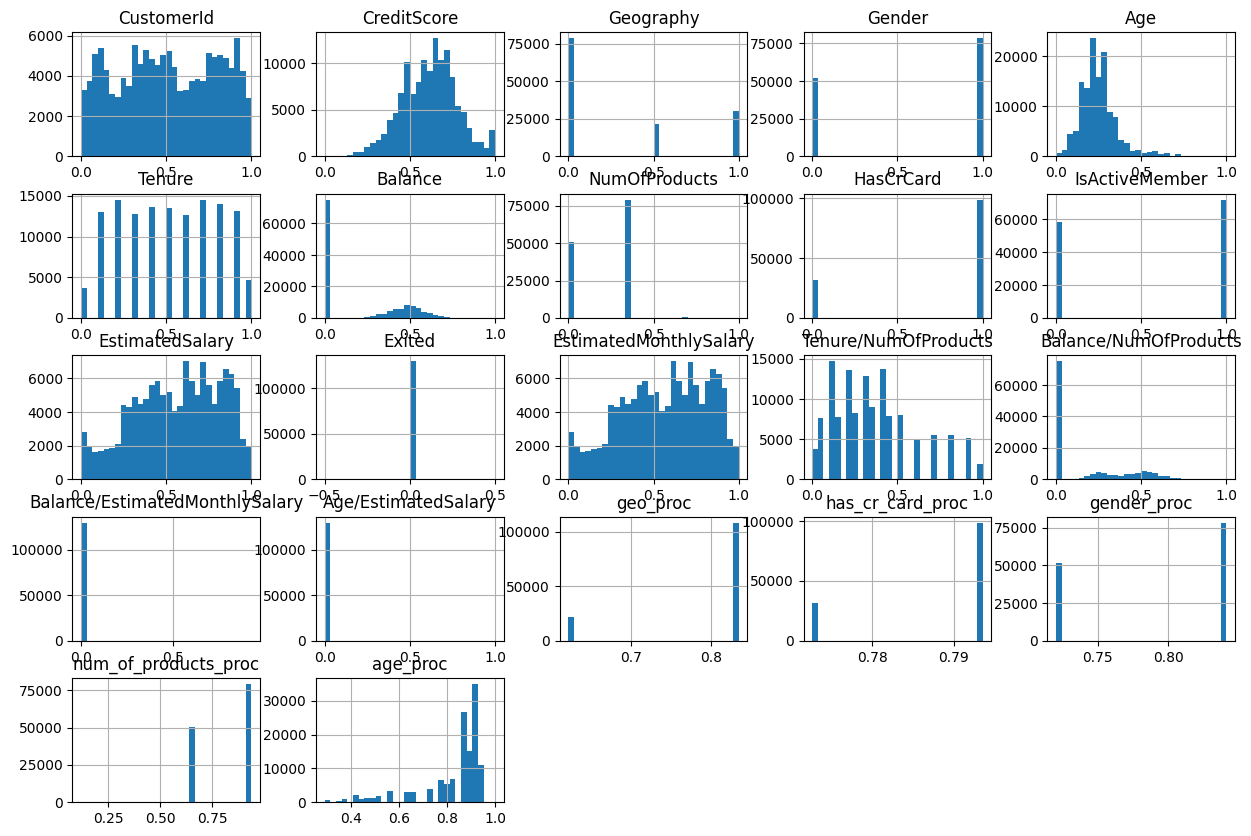

In [155]:
train_data[train_data["Exited"] == 0].hist(figsize=(15, 10), bins=30)

In [156]:
train_data.describe()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,...,EstimatedMonthlySalary,Tenure/NumOfProducts,Balance/NumOfProducts,Balance/EstimatedMonthlySalary,Age/EstimatedSalary,geo_proc,has_cr_card_proc,gender_proc,num_of_products_proc,age_proc
count,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,...,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,0.505238,0.612909,0.324273,0.564429,0.271971,0.502035,0.221118,0.184818,0.753954,0.497770,...,0.562870,0.366285,0.196566,0.000163,0.000275,0.788401,0.788401,0.788401,0.788401,0.788401
std,0.285604,0.160207,0.408287,0.495833,0.119827,0.280616,0.250371,0.182385,0.430707,0.499997,...,0.251488,0.251750,0.237923,0.007124,0.006862,0.086247,0.009043,0.059813,0.171601,0.174667
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.621048,0.772571,0.720313,0.117484,0.291876
25%,0.269772,0.494000,0.000000,0.000000,0.189189,0.300000,0.000000,0.000000,1.000000,0.000000,...,0.373166,0.166667,0.000000,0.000000,0.000033,0.827824,0.793567,0.720313,0.652881,0.739758
50%,0.497894,0.618000,0.000000,1.000000,0.256757,0.500000,0.000000,0.333333,1.000000,0.000000,...,0.589738,0.300000,0.000000,0.000000,0.000053,0.834718,0.793567,0.840945,0.939578,0.875850
75%,0.764526,0.720000,0.500000,1.000000,0.324324,0.700000,0.478041,0.333333,1.000000,1.000000,...,0.775779,0.500000,0.431542,0.000076,0.000095,0.834718,0.793567,0.840945,0.939578,0.915551
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.834718,0.793567,0.840945,0.939578,1.000000


#### Outliner Elimination

In [157]:
# train_data = train_data[train_data.apply(lambda x :(x-x.mean()).abs()<(2*x.std()) ).all(1)]


In [158]:
train_data

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,...,EstimatedMonthlySalary,Tenure/NumOfProducts,Balance/NumOfProducts,Balance/EstimatedMonthlySalary,Age/EstimatedSalary,geo_proc,has_cr_card_proc,gender_proc,num_of_products_proc,age_proc
0,0.436943,0.636,0.0,1.0,0.202703,0.3,0.000000,0.333333,1.0,0.0,...,0.907279,0.15,0.000000,0.000000,0.000020,0.834718,0.793567,0.840945,0.939578,0.900442
1,0.733936,0.554,0.0,1.0,0.202703,0.1,0.000000,0.333333,1.0,1.0,...,0.247483,0.05,0.000000,0.000000,0.000128,0.834718,0.793567,0.840945,0.939578,0.900442
2,0.515259,0.656,0.0,1.0,0.297297,1.0,0.000000,0.333333,1.0,0.0,...,0.924364,0.50,0.000000,0.000000,0.000028,0.834718,0.793567,0.840945,0.939578,0.784517
3,0.702895,0.462,0.0,1.0,0.216216,0.2,0.593398,0.000000,1.0,1.0,...,0.422787,0.20,0.624540,0.000137,0.000069,0.834718,0.793567,0.840945,0.652881,0.931014
4,0.801919,0.732,1.0,1.0,0.202703,0.5,0.000000,0.333333,1.0,1.0,...,0.075293,0.25,0.000000,0.000000,0.000468,0.827824,0.793567,0.840945,0.939578,0.900442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,0.405554,0.634,1.0,0.0,0.202703,0.2,0.000000,0.000000,1.0,1.0,...,0.659179,0.20,0.000000,0.000000,0.000036,0.827824,0.793567,0.720313,0.652881,0.900442
165030,0.399298,0.884,0.0,1.0,0.229730,0.3,0.000000,0.000000,0.0,0.0,...,0.659177,0.30,0.000000,0.000000,0.000039,0.834718,0.772571,0.840945,0.652881,0.875850
165031,0.396221,0.430,0.0,1.0,0.175676,0.5,0.000000,0.000000,1.0,1.0,...,0.637151,0.50,0.000000,0.000000,0.000034,0.834718,0.793567,0.840945,0.652881,0.915551
165032,0.495674,0.408,1.0,0.0,0.162162,0.7,0.643819,0.000000,0.0,1.0,...,0.355841,0.70,0.677607,0.000176,0.000074,0.827824,0.772571,0.720313,0.652881,0.921275


#### Pas 1.3.2: Correlation Matrix

<Axes: >

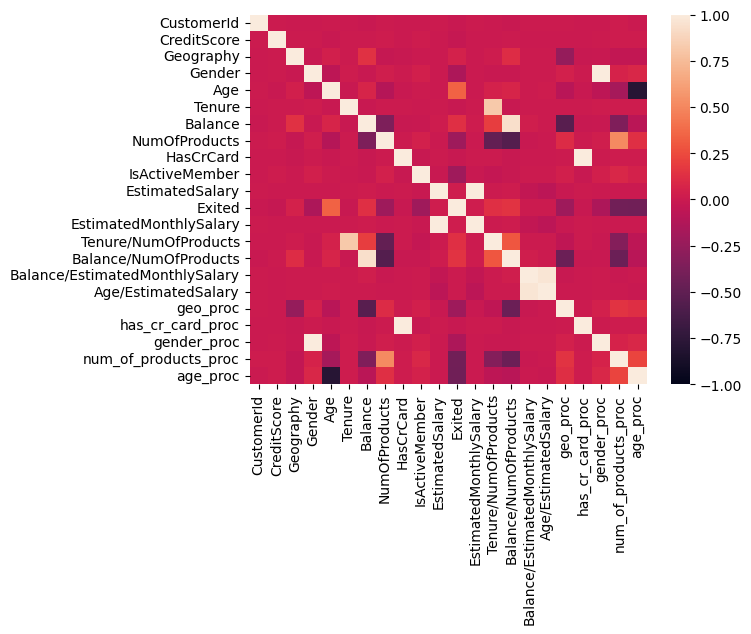

In [159]:
import seaborn as sns

corr = train_data.corr()

sns.heatmap(corr, vmin=-1.0, vmax=1.0)

#### Pas 1.3.3: Box Plot

<Axes: >

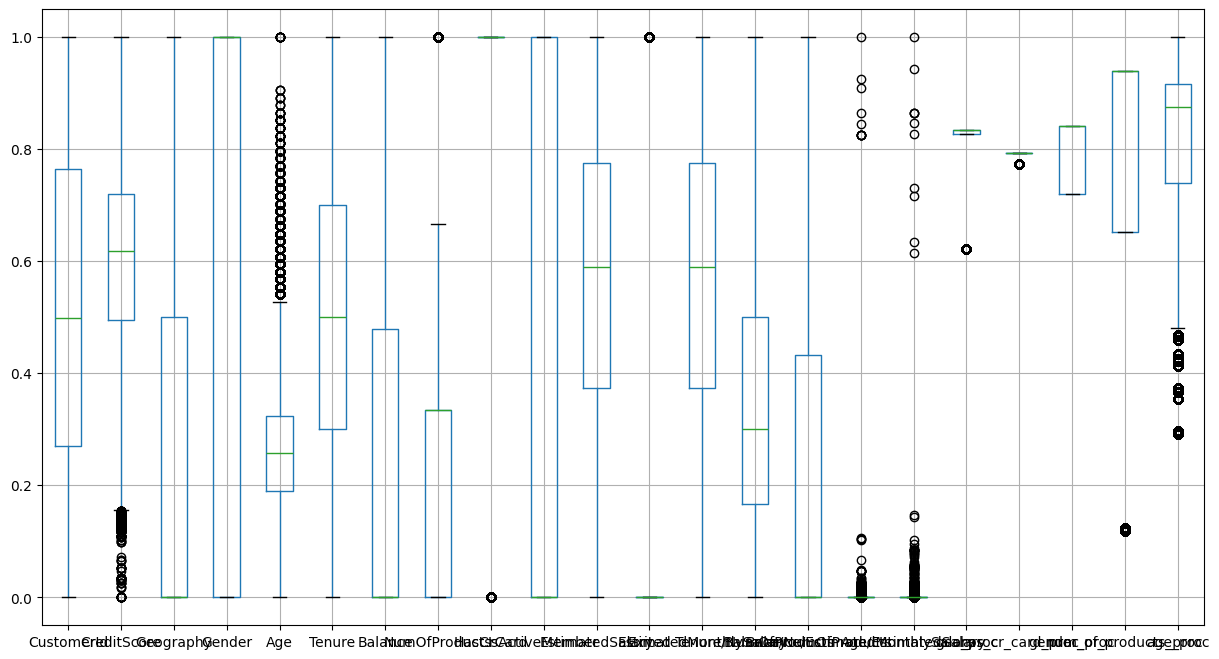

In [160]:
train_data.boxplot(figsize=(15, 8))

<Axes: >

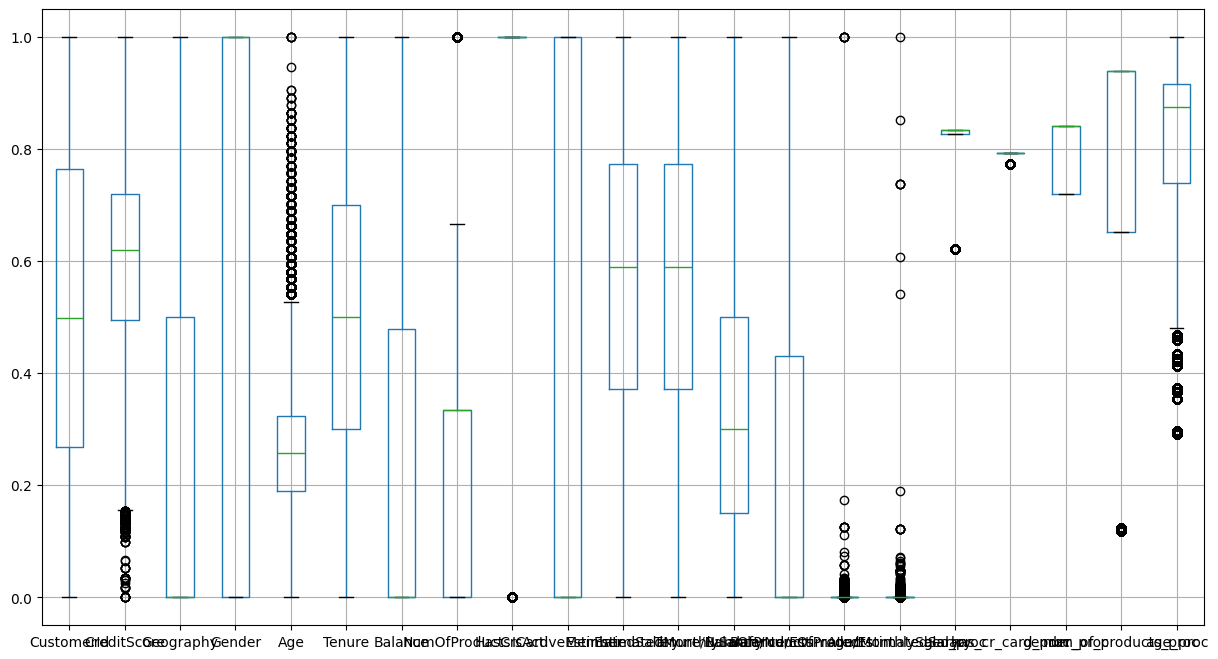

In [161]:
test_data.boxplot(figsize=(15, 8))

In [162]:
train_data.drop(columns="CustomerId", inplace=True)
test_data.drop(columns="CustomerId", inplace=True)

## Pas 2: Train Test Split

In [163]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(train_data.drop(columns="Exited"), train_data["Exited"], test_size=0.1, shuffle=True)

In [164]:
train_X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,EstimatedMonthlySalary,Tenure/NumOfProducts,Balance/NumOfProducts,Balance/EstimatedMonthlySalary,Age/EstimatedSalary,geo_proc,has_cr_card_proc,gender_proc,num_of_products_proc,age_proc
33303,0.622,0.0,0.0,0.202703,0.2,0.000000,0.333333,1.0,1.0,0.844133,0.844133,0.10,0.000000,0.000000,0.000023,0.834718,0.793567,0.720313,0.939578,0.900442
4142,0.312,1.0,1.0,0.297297,0.5,0.000000,0.333333,1.0,1.0,0.262237,0.262237,0.25,0.000000,0.000000,0.000150,0.827824,0.793567,0.840945,0.939578,0.784517
134535,0.352,0.5,1.0,0.581081,0.6,0.394807,0.000000,1.0,1.0,0.718004,0.718004,0.60,0.415526,0.000054,0.000074,0.621048,0.793567,0.840945,0.652881,0.557190
21729,0.490,0.5,0.0,0.162162,0.7,0.349700,0.333333,0.0,0.0,0.617940,0.617940,0.35,0.184026,0.000055,0.000034,0.621048,0.772571,0.720313,0.939578,0.921275
57732,0.724,0.0,0.0,0.121622,1.0,0.000000,0.333333,1.0,1.0,0.472712,0.472712,0.50,0.000000,0.000000,0.000043,0.834718,0.793567,0.720313,0.939578,0.929161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152238,0.530,0.0,1.0,0.581081,0.1,0.000000,0.333333,1.0,1.0,0.687607,0.687607,0.05,0.000000,0.000000,0.000079,0.834718,0.793567,0.840945,0.939578,0.557190
42907,0.518,1.0,0.0,0.283784,0.6,0.422665,0.000000,0.0,1.0,0.922653,0.922653,0.60,0.444847,0.000045,0.000027,0.827824,0.772571,0.720313,0.652881,0.828172
56497,0.998,1.0,0.0,0.283784,0.7,0.464983,0.000000,1.0,0.0,0.844459,0.844459,0.70,0.489386,0.000054,0.000031,0.827824,0.793567,0.720313,0.652881,0.828172
96539,0.706,0.0,1.0,0.270270,0.6,0.000000,0.000000,0.0,0.0,0.444120,0.444120,0.60,0.000000,0.000000,0.000075,0.834718,0.772571,0.840945,0.652881,0.870322


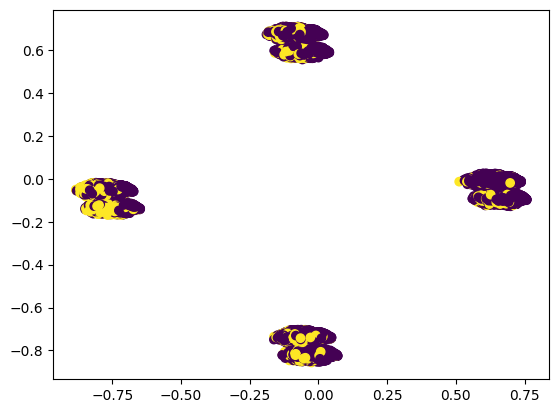

In [165]:
from sklearn.decomposition import PCA

pca2d = PCA(n_components=2)

points = pca2d.fit_transform(train_X)

plt.scatter(points[:, 0], points[:, 1], c=train_y)

## Pas 3: Model Selection and Training

In [166]:
# from sklearn.preprocessing import PolynomialFeatures

# poly_f = PolynomialFeatures()

# train_X = poly_f.fit_transform(train_X)
# test_X = poly_f.fit_transform(test_X)

# test_data = poly_f.fit_transform(test_data)

In [167]:
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier


In [168]:

# from sklearn.utils import all_estimators
# from sklearn.base import ClassifierMixin

# def try_all_model(train_X, train_y):
#     estimators = all_estimators()

#     print(estimators)

#     for name, class_ in estimators:
#         if(name == "GaussianProcessClassifier" or name == "LabelPropagation" or name == "LabelSpreading"): continue
#         if(name != "VotingClassifier"): continue
#         if hasattr(class_, 'predict_proba') and issubclass(class_, ClassifierMixin):
#             # try:
#             print("Trying model", name)
            
#             model = class_()
#             model.fit(train_X, train_y)

#             print("-> Done.", "Score:", model.score(train_X, train_y))

#             pred = model.predict_proba(test_data)

#             f = open("ans_" + name + ".csv", 'w')

#             f.write("id,Exited\n")

#             idx = 0

#             for a, b in pred:
#                 f.write(str(test_data_customer_ids[idx]) + "," + str((b.round(7))) + "\n")
#                 idx += 1

#             f.close()
#             # except TypeError:
#             #     pass;


# try_all_model(train_X, train_y)


In [181]:
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.ensemble import AdaBoostClassifier
import xgboost
from catboost import CatBoostClassifier



model = MLPClassifier(max_iter=10000, learning_rate='adaptive', tol=1e-8, verbose=1)

model.fit(train_X, train_y)

Iteration 1, loss = 0.37345225
Iteration 2, loss = 0.33358164
Iteration 3, loss = 0.32726359
Iteration 4, loss = 0.32585269
Iteration 5, loss = 0.32502464
Iteration 6, loss = 0.32450212
Iteration 7, loss = 0.32391365
Iteration 8, loss = 0.32372569
Iteration 9, loss = 0.32316892
Iteration 10, loss = 0.32286680
Iteration 11, loss = 0.32292756
Iteration 12, loss = 0.32278476
Iteration 13, loss = 0.32247797
Iteration 14, loss = 0.32234541
Iteration 15, loss = 0.32232966
Iteration 16, loss = 0.32211162
Iteration 17, loss = 0.32190670
Iteration 18, loss = 0.32217493
Iteration 19, loss = 0.32192648
Iteration 20, loss = 0.32186991
Iteration 21, loss = 0.32162639
Iteration 22, loss = 0.32202458
Iteration 23, loss = 0.32142489
Iteration 24, loss = 0.32147984
Iteration 25, loss = 0.32151079
Iteration 26, loss = 0.32130414
Iteration 27, loss = 0.32129798
Iteration 28, loss = 0.32144191
Iteration 29, loss = 0.32115337
Iteration 30, loss = 0.32125458
Iteration 31, loss = 0.32112088
Iteration 32, los

MLPClassifier(learning_rate='adaptive', max_iter=10000, tol=1e-08, verbose=1)

MLPClassifier, XGBClassifier, CatBoostClassifier, RandomForestClassifier, LogisticRegression, 

In [170]:
# import torch
# import torch.nn as nn

# nn_model = nn.Sequential(
#     nn.Linear(17, 60),
#     nn.ReLU(),
#     nn.Linear(60, 45),
#     nn.ReLU(),
#     nn.Linear(45, 15),
#     nn.ReLU(),
#     nn.Linear(15, 2)
# )

# loss_fn = nn.BCELoss()
# device = torch.device("mps")
# batch_size = 500

# nn_model.to(device)

In [171]:
# import numpy as np

# features_nn = train_X.values
# labels_nn = []

# for elm in train_y.values:
#     if(elm == 0):
#         labels_nn.append(1)
#         labels_nn.append(0)
#     else:
#         labels_nn.append(0)
#         labels_nn.append(1)
    
# labels_nn = np.array(labels_nn)
# labels_nn = labels_nn.reshape(-1, 2)



        

In [172]:
# opt = torch.optim.Adam(nn_model.parameters(), lr=0.0001)

# def train(epoch):
#     nn_model.train()
#     print("epoch: ", epoch)

#     loss_avg = 0;
#     loss_total = 0

#     for batch_idx in range(1, len(features_nn), batch_size):
#         X = torch.tensor(features_nn[batch_idx:batch_idx + batch_size], device=device, dtype=torch.float32)
#         y = torch.tensor(labels_nn[batch_idx:batch_idx + batch_size], device=device, dtype=torch.float32)

#         pred = nn_model(X)

#         loss = loss_fn(pred, y)

#         loss_avg += loss.item()
#         loss_total += loss.item()


#         opt.zero_grad()
#         loss.backward()
#         opt.step() 

#     loss_avg /= len(features_nn)
#     print("---> Avrage Loss:", loss_avg)
#     print("---> Total Loss:", loss_total)

# # for e in range(100):
# #     train(e)
# #     torch.save(nn_model, "model_" + str(e))

### Pas 3.1: AUC si ROC plot

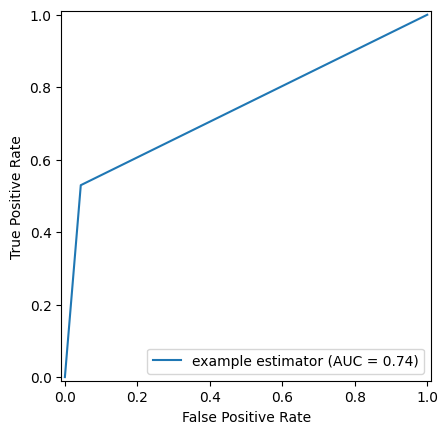

In [182]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(train_y, model.predict(train_X))

roc_auc = metrics.auc(fpr, tpr)

display_ = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')

display_.plot()


In [183]:
model.score(test_X, test_y)

0.864396509936985

In [184]:
test_data.shape

(110023, 20)

In [185]:

pred = model.predict_proba(test_data)

In [186]:
f = open("ans.csv", 'w')

f.write("id,Exited\n")

idx = 0

for a, b in pred:
    f.write(str(test_data_customer_ids[idx]) + "," + str((b.round(7))) + "\n")
    idx += 1

f.close()


In [187]:
from sklearn.base import ClassifierMixin
from sklearn.utils import all_estimators
classifiers=[est for est in all_estimators() if hasattr(est[1], 'predict_proba') and issubclass(est[1], ClassifierMixin)]
print(classifiers)

[('AdaBoostClassifier', <class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'>), ('BaggingClassifier', <class 'sklearn.ensemble._bagging.BaggingClassifier'>), ('BernoulliNB', <class 'sklearn.naive_bayes.BernoulliNB'>), ('CalibratedClassifierCV', <class 'sklearn.calibration.CalibratedClassifierCV'>), ('CategoricalNB', <class 'sklearn.naive_bayes.CategoricalNB'>), ('ClassifierChain', <class 'sklearn.multioutput.ClassifierChain'>), ('ComplementNB', <class 'sklearn.naive_bayes.ComplementNB'>), ('DecisionTreeClassifier', <class 'sklearn.tree._classes.DecisionTreeClassifier'>), ('DummyClassifier', <class 'sklearn.dummy.DummyClassifier'>), ('ExtraTreeClassifier', <class 'sklearn.tree._classes.ExtraTreeClassifier'>), ('ExtraTreesClassifier', <class 'sklearn.ensemble._forest.ExtraTreesClassifier'>), ('FixedThresholdClassifier', <class 'sklearn.model_selection._classification_threshold.FixedThresholdClassifier'>), ('GaussianNB', <class 'sklearn.naive_bayes.GaussianNB'>), ('GaussianProces